In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jun-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2021/train.csv
/kaggle/input/tabular-playground-series-jun-2021/test.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/train.csv")
train_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [3]:
train_data.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [4]:
trainy=train_data['target']
trainx=train_data.drop(["id","target"],axis=1)
trainy=np.array(pd.get_dummies(trainy))
trainx.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,1.719655,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,5.916988,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,1.000000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,72.000000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [5]:
# from sklearn.datasets import load_iris
# from sklearn import preprocessing
# trainx = preprocessing.normalize(trainx)
maxx=trainx.max(axis=0)
minx=trainx.min(axis=0)
trainx=(trainx-minx)/(maxx-minx)
trainx=np.c_[np.ones((trainx.shape[0],1)),trainx]

In [6]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z),axis=1).reshape(z.shape[0],1)

In [7]:
def cost(x,y,theta):
    z=np.dot(x,theta)
    a=softmax(z)
    return (-1/x.shape[0])*np.sum(y*np.log(a))

In [8]:
def grad(x,y,theta,alpha,epochs):
    m=x.shape[0]
    costs=[]
    for i in range(epochs):
        h=softmax(np.dot(x,theta))
        theta+=(alpha/m)*(np.dot(x.T,y*(1-h)))
        costs.append(cost(x,y,theta))
    return theta,costs

In [9]:
theta=np.random.normal(scale=1/(trainx.shape[1]**0.5),size=(trainx.shape[1],trainy.shape[1]))
theta,costs=grad(trainx,trainy,theta,0.01,1000)

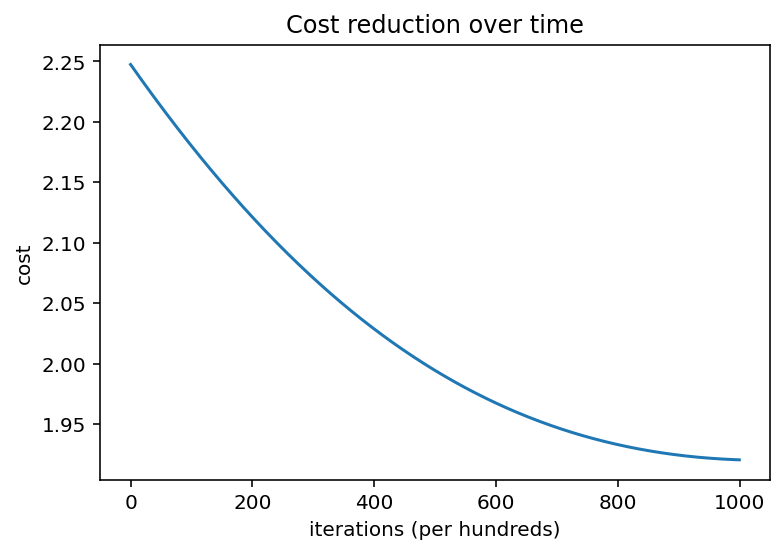

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [11]:
test_data=pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/test.csv")
test_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
test_data.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,249999.500000,0.99051,1.168520,2.182730,2.316240,0.792050,1.435520,1.016930,0.679780,1.945370,...,1.797590,0.50930,1.793660,0.909660,1.616010,1.201490,0.798630,1.313360,2.93515,0.64209
std,28867.657797,4.01893,4.030234,6.402817,7.584742,2.938386,5.164174,3.956569,2.262651,3.938406,...,5.075318,1.87308,7.071364,3.797739,4.944454,4.784381,2.427921,4.443859,10.78833,3.98134
min,200000.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,224999.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,249999.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,274999.250000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,0.00000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.00000
max,299999.000000,61.00000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.000000,...,54.000000,24.00000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,127.00000,52.00000


In [13]:
testx=test_data.drop(["id"],axis=1)
testx.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,0.99051,1.168520,2.182730,2.316240,0.792050,1.435520,1.016930,0.679780,1.945370,1.716100,...,1.797590,0.50930,1.793660,0.909660,1.616010,1.201490,0.798630,1.313360,2.93515,0.64209
std,4.01893,4.030234,6.402817,7.584742,2.938386,5.164174,3.956569,2.262651,3.938406,5.876687,...,5.075318,1.87308,7.071364,3.797739,4.944454,4.784381,2.427921,4.443859,10.78833,3.98134
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,0.00000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.00000
max,61.00000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.000000,72.000000,...,54.000000,24.00000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,127.00000,52.00000


In [14]:
testx=(testx-minx)/(maxx-minx)
testx=np.c_[np.ones((testx.shape[0],1)),testx]

In [15]:
testz=np.dot(testx,theta)
testh=softmax(testz)
df=pd.DataFrame(testh)
df

,0,1,2,3,4,5,6,7,8
0,0.056136,0.093960,0.079298,0.044476,0.040303,0.251355,0.059883,0.276328,0.098261
1,0.053837,0.093113,0.076423,0.042920,0.038784,0.249002,0.058585,0.291416,0.095921
2,0.055223,0.092041,0.076838,0.044044,0.036180,0.264683,0.059979,0.277333,0.093677
3,0.055255,0.091823,0.069162,0.038915,0.037879,0.262737,0.058377,0.285219,0.100633
4,0.057009,0.092998,0.070879,0.039057,0.036281,0.250535,0.058797,0.292600,0.101843
...,...,...,...,...,...,...,...,...,...
99995,0.054430,0.093946,0.078071,0.044154,0.039703,0.254302,0.059116,0.278737,0.097541
99996,0.055447,0.092937,0.077128,0.044096,0.040655,0.253005,0.059968,0.280263,0.096501
99997,0.055520,0.093975,0.078293,0.043822,0.039976,0.249196,0.058935,0.281936,0.098346
99998,0.053021,0.095910,0.078613,0.042119,0.035714,0.252227,0.059540,0.288348,0.094509


In [16]:
print(testh.shape)
print(np.max(testh,axis=1).shape)
out=pd.DataFrame((testh==np.max(testh,axis=1).reshape(testh.shape[0],1)).astype(int))
print(out.sum(axis=0))

(100000, 9)
(100000,)
0        0
1        0
2        0
3        0
4        0
5    14588
6        0
7    85412
8        0
dtype: int64


In [17]:
sub = pd.read_csv('../input/tabular-playground-series-jun-2021/sample_submission.csv')

sub[sub.columns[1:]] = df

sub.to_csv("my_submission.csv",index = False)
sub.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.056136,0.093960,0.079298,0.044476,0.040303,0.251355,0.059883,0.276328,0.098261
1,200001,0.053837,0.093113,0.076423,0.042920,0.038784,0.249002,0.058585,0.291416,0.095921
2,200002,0.055223,0.092041,0.076838,0.044044,0.036180,0.264683,0.059979,0.277333,0.093677
3,200003,0.055255,0.091823,0.069162,0.038915,0.037879,0.262737,0.058377,0.285219,0.100633
4,200004,0.057009,0.092998,0.070879,0.039057,0.036281,0.250535,0.058797,0.292600,0.101843
